<a href="https://colab.research.google.com/github/WeiKuoLi/Picture-Interpolation/blob/main/picture_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
!pip install kaggle
import json
import zipfile
import os
!ls
!pwd
!mkdir ./.kaggle ~/.kaggle /content/.kaggle
!cp ./kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
drive  kaggle.json  lena.bmp  sample_data
/content
mkdir: cannot create directory ‘./.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘/content/.kaggle’: File exists


In [6]:
 !ls /content/.kaggle
os.listdir('/content/.kaggle')
!mv ./*zip ./drive/MyDrive/database

In [13]:
!chmod 600 kaggle.json
!cp kaggle.json ./drive/MyDrive
!cp lena.bmp ./drive/MyDrive/database

In [8]:
#!kaggle datasets download -d joaopauloschuler/cifar100-128x128-resized-via-cai-super-resolution
  
zip_ref = zipfile.ZipFile('./drive/MyDrive/database/cifar100-128x128-resized-via-cai-super-resolution.zip', 'r')
zip_ref.extractall()
zip_ref.close() 
#ANOTHER SET THAT INTERESTS ME Chaladze G., Kalatozishvili L. 2017. Linnaeus 5 Dataset for Machine Learning 

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import cv2
from google.colab.patches import cv2_imshow  ##only use when in google colab
from os import listdir
import re
import gc   
import random

In [10]:
# import libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

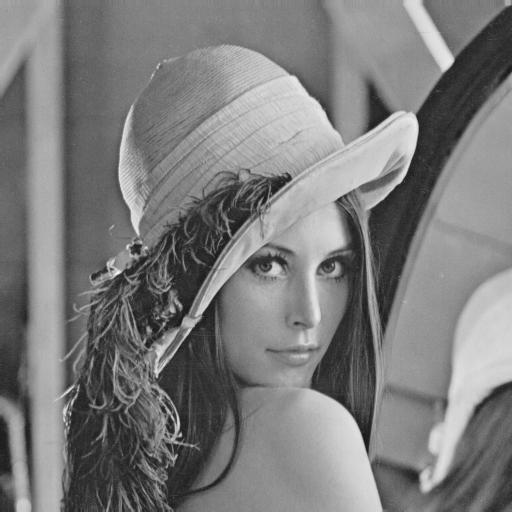

In [11]:
img = cv2.imread('lena.bmp')
cv2_imshow(img)

In [14]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a[:2][:]

array([[1, 2, 3],
       [4, 5, 6]])

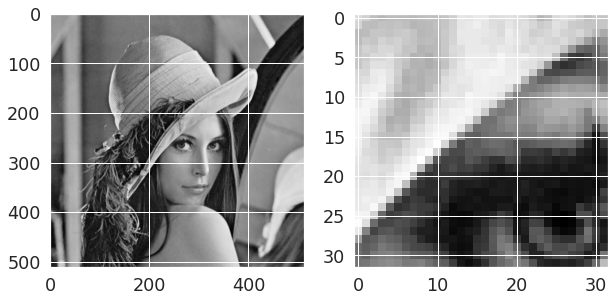

In [15]:
simg = tf.reduce_mean(img,axis=2)
def cut_pic(s,size,x,y):
  w = np.split(s,[x,x+size])[1]
  return np.split(w,[y,y+size],axis=1)[1]

def cut_9pic(s,size):   #returns 3d array size=32
  #w=np.zeros((size,size,9))
  #for i in range(size*3):
  #  for j in range(size*3):
  #    w[i%size][j%size][int(i/size)*3+int(j/size)]=s[i+x][j+y]
  t=s.reshape(32,3,32,3, order='F')  #F=forward  first axis runs fastest
  t=np.swapaxes(t,1,2)
  w = t.reshape(32,32,9)
  return w

mimg = cut_pic(np.array(simg),32,239,239)
#m = cut_pic(np.array(s),96,207,207)
fig, ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(simg,cmap=plt.cm.gray)
ax[1].imshow(mimg,cmap=plt.cm.gray)
plt.show()



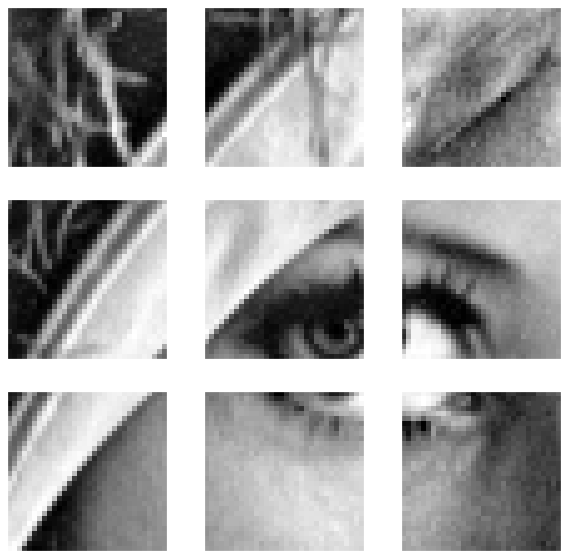

In [18]:
m9_img = cut_9pic(cut_pic(np.array(simg),96,207,207),32)

def plot9(m9):   #eats a 3d array
  fig, ax=plt.subplots(3,3,figsize=(10,10))  
  tmp9=np.swapaxes(m9,0,2)
  tmp9=np.swapaxes(tmp9,1,2)
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(tmp9[3*i+j],cmap=plt.cm.gray)
 
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.show()
  return
plot9(m9_img)  

In [ ]:
#plt.imshow(tmp9[4],cmap=plt.cm.gray)

(128, 128, 3)


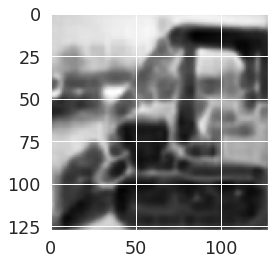

In [16]:
path='./cifar100-128/train/'
all=os.listdir(path)
xall=random.sample(all, 1)[0]

fig=os.listdir(path+xall)
xfig=random.sample(fig, 1)[0]
p=cv2.imread(path+xall+'/'+xfig)
print(np.array(p).shape)


p=tf.reduce_mean(p,axis=2)
'''
p2=p.numpy()
p3=cv2.resize(np.array(p2),dsize=(512,512))
'''

plt.imshow(p,cmap=plt.cm.gray)

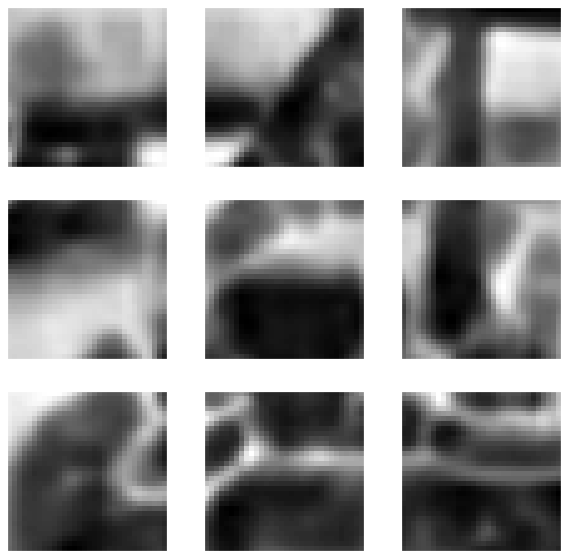

In [19]:
def get_r_9pic(pic,lim,size): #p_3d (32,32,9)
  size3=3*size 
  x = random.randint(0, lim-size3)
  y = random.randint(0, lim-size3)
  p_3d=cut_9pic(cut_pic(pic,size*3,x,y),size)
  return p_3d
p_3d=get_r_9pic(p,128,32)
plot9(p_3d)
#ids = random.sample(list(train_df['StudyInstanceUID'].values), n_ids)

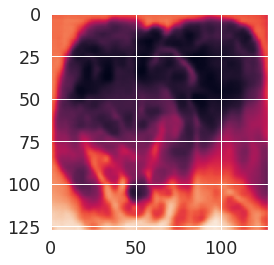

In [20]:
path='./cifar100-128/train/'
all=os.listdir(path)
n_image=400
all_pic=[]
for i in range(10):
  xall=random.sample(all, 10)[i]
  fig=os.listdir(path+xall)
  xfig=random.sample(fig, n_image)
  for j in range(n_image):
    all_pic.append(cv2.imread(path+xall+'/'+xfig[j]))



all_pic=tf.reduce_mean(all_pic,axis=3)
plt.imshow(all_pic[3])

In [ ]:
all_pic.shape


TensorShape([4000, 128, 128])

In [ ]:
all_pic_3d=[]
target=[]
for pic in all_pic:
  
  pic_3d=get_r_9pic(np.array(pic),128,32)

  s = np.std(pic_3d)
  m = np.mean(pic_3d)
  pic_3d = (pic_3d - m) /s 
#the m and s are wrong
  all_pic_3d.append(np.delete(pic_3d,4,2))
  pic_3d=np.swapaxes(pic_3d,0,2)
  pic_3d=np.swapaxes(pic_3d,1,2)
  target.append(pic_3d[4])

print(np.array(all_pic_3d).shape, np.array(target).shape)


(4000, 32, 32, 8) (4000, 32, 32)


In [ ]:
print(np.array(all_pic_3d).shape, np.array(target).shape)

(4000, 32, 32, 8) (4000, 32, 32)


**2D CNN MODEL**

In [ ]:
# import libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

In [ ]:
#gpu related
#os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 

In [ ]:

train_X = (tf.convert_to_tensor(all_pic_3d,dtype=tf.float32))

train_Y = (tf.convert_to_tensor(target,dtype=tf.float32))

In [ ]:
def get_model():
    
    img_input = layers.Input(shape=(32,32,8))
   
    # First convolution extracts 16 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    x = layers.Resizing(48, 48, interpolation="bilinear", crop_to_aspect_ratio=False)(img_input)
    #x = layers.Conv2D(36, 3, activation='relu')(x)
   # x = layers.MaxPooling3D(2)(x)
   
    xt = layers.Conv2D(16, 3, activation='relu')(x)
    
    x2 = layers.Conv2D(12, 3, activation='relu')(xt)
    #x2 = layers.MaxPooling2D(2)(x2)
    
    #x3 = layers.Conv2D(8, 3, activation='relu')(x2)
    x3 = layers.Resizing(32, 32, interpolation="bilinear", crop_to_aspect_ratio=False)(x2)
    #x4 = layers.Reshape((32,32))(x3) 
 
     
    x4 = layers.Dense(4, activation='tanh')(x3)
    output = layers.Dense(1, activation='tanh')(x4)

    # Create model:
    model = Model(img_input, output)
    
    return model
tf.keras.backend.clear_session()

In [ ]:
def model_getfit(A,B):
    tf.keras.backend.clear_session()
    model = get_model()
    model.summary()
    model.compile( loss=tf.keras.losses.MeanSquaredError() , #competition_loss, 
              optimizer=RMSprop(learning_rate=0.005),
              metrics=[tf.keras.metrics.MeanSquaredError()])


    history = model.fit(A,B, validation_split=0.2, epochs =103) #delete
    return model, history

In [ ]:
model, history = model_getfit(train_X,train_Y)
'''
print("loss for validation data = ")
val_prediction=model.predict(val_X)
val_loss = tf.reduce_mean(tf.keras.metrics.MeanSquaredError(val3D_Y,val3D_prediction),keepdims=False)
print(val_3D_loss)
'''


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 8)]       0         
                                                                 
 resizing (Resizing)         (None, 48, 48, 8)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 16)        1168      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 12)        1740      
                                                                 
 resizing_1 (Resizing)       (None, 32, 32, 12)        0         
                                                                 
 dense (Dense)               (None, 32, 32, 4)         52        
                                                                 
 dense_1 (Dense)             (None, 32, 32, 1)         5     

'\nprint("loss for validation data = ")\nval_prediction=model.predict(val_X)\nval_loss = tf.reduce_mean(tf.keras.metrics.MeanSquaredError(val3D_Y,val3D_prediction),keepdims=False)\nprint(val_3D_loss)\n'

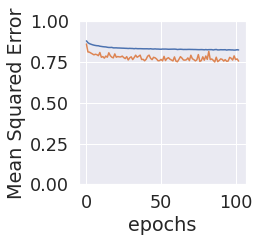

In [ ]:
#Define figure and axes
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.set_ylim(ymin=0., ymax=1)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

# add the image 
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
#plt.scatter(len(history_3D.history['val_loss']),val_3D_loss)
#plt.scatter(10,history_3D.history['loss'][0])
# Add the boxe
#res=[]
#res.append([300,history_3D.history['loss'],(history_3D.history['val_loss'])])
# diplay
plt.show()

125/125 [==============================] - 0s 2ms/step


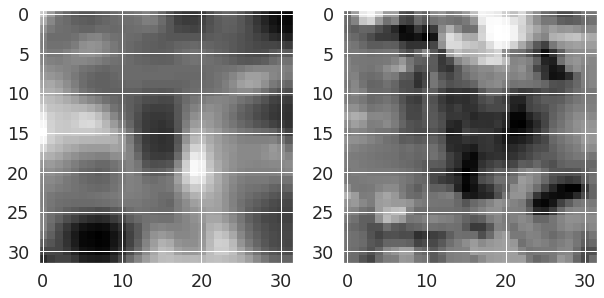

In [ ]:
y_pred=model.predict(train_X)
fig, ax=plt.subplots(1,2,figsize=(10,10))
iim =  random.randint(0, 2000)
ax[0].imshow(train_Y[iim],cmap=plt.cm.gray)
y_predi=y_pred[iim] 
y_predi=y_predi.reshape(32,32)
ax[1].imshow(y_predi,cmap=plt.cm.gray)
plt.show()

In [ ]:
m9_img = cut_9pic(cut_pic(np.array(simg),96,207,207),32)
print(m9_img.shape)

(32, 32, 9)


(32, 32, 9)
(1, 32, 32, 8)
1/1 [==============================] - 0s 147ms/step


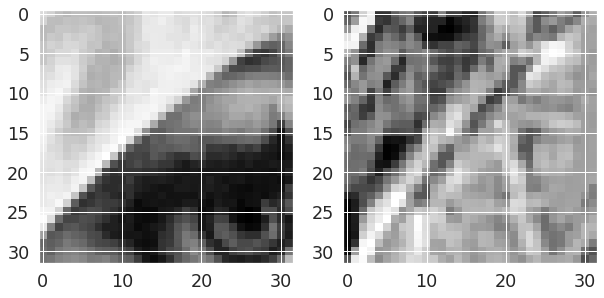

(9, 32, 32)


In [ ]:
m9_img = cut_9pic(cut_pic(np.array(simg),96,207,207),32)
print(m9_img.shape)
m9_3d=[]
m9_t=[] 

s = np.std(m9_img)
m = np.mean(m9_img)
m9_img = (m9_img - m) /s  
m9_3d=[(np.delete(m9_img,4,2)) ]

print(np.array(m9_3d).shape)
m9_img=np.swapaxes(m9_img,0,2)
m9_img=np.swapaxes(m9_img,1,2)
m9_t.append(m9_img[4])
#m9_3d=np.swapaxes(m9_3d,0,2)
#m9_3d=np.swapaxes(m9_3d,1,2)
m9_pred=model.predict((tf.convert_to_tensor(m9_3d,dtype=tf.float32)))
fig, ax=plt.subplots(1,2,figsize=(10,10))
 
ax[0].imshow(m9_t[0],cmap=plt.cm.gray)
m9_predi=m9_pred[0] 
m9_predi=m9_predi.reshape(32,32)
#m9_predi = m9_predi*s+m
ax[1].imshow(m9_predi,cmap=plt.cm.gray)
plt.show()
print(np.array(m9_img).shape)
 

(32, 32)
now (9, 32, 32)
(9, 32, 32)


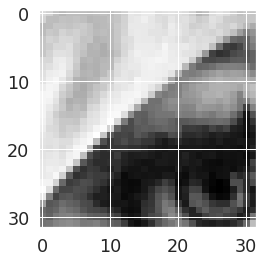

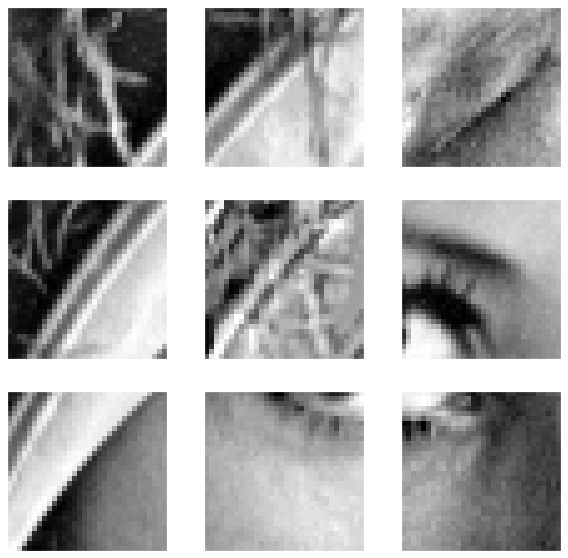

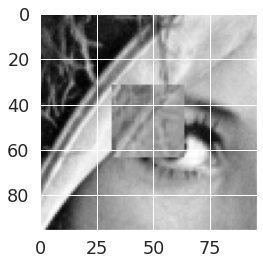

In [ ]:
print(np.array(m9_predi).shape)
print('now',np.array(m9_img).shape)
#m9_img=np.swapaxes(m9_img,0,2)
#m9_img=np.swapaxes(m9_img,2,1)
print(np.array(m9_img).shape)
plt.imshow(m9_img[4],cmap=plt.cm.gray)
m9_img[4]=m9_predi 
m9_img2=np.swapaxes(m9_img,2,1)
m9_img2=np.swapaxes(m9_img2,0,2)

plot9(m9_img2)

w = m9_img2.reshape(32,32,3,3)
w=np.swapaxes(w,1,2)
w=w.reshape(96,96, order='F')  #F=forward  first axis runs fastest
plt.imshow(w,cmap=plt.cm.gray)

# Total Failure 
Our programs crops out 9 pics,
cut down the middle one
try to use 2D CNN  to fit the middle one.
Firstly, the 8 surrounding pics as 8 channels does not make sense.(Because it becomes nonlocal)

Result is very bad, because human eyes are sensitive to abrupt change.
MSE of the middle picture along does not capture that.
In the end the model just outputs a gray blur.

# Start #2 model, hollow out the center box and fit it back

TRY FFT,IFFT and hollow out center box

(4000, 128, 128)
[[ 1.89959900e+06 -2.98376868e+04  3.61972749e+03 ... -3.69725284e+03
   3.61972749e+03 -2.98376868e+04]
 [-1.26689662e+04  7.04270532e+04  1.18730316e+04 ... -1.16840623e+04
  -1.82648168e+04 -2.24916505e+04]
 [-8.79282813e+04  3.74775718e+03  5.48970193e+03 ...  1.39270860e+02
  -4.26061816e+03 -4.98332301e+03]
 ...
 [ 6.89803990e+04 -5.79607069e+03  5.85840792e+03 ... -5.22377743e+03
  -1.35485792e+03 -1.01001585e+04]
 [-8.79282813e+04 -4.98332301e+03 -4.26061816e+03 ...  3.89643428e+03
   5.48970193e+03  3.74775718e+03]
 [-1.26689662e+04 -2.24916505e+04 -1.82648168e+04 ...  1.00196066e+04
   1.18730316e+04  7.04270532e+04]]


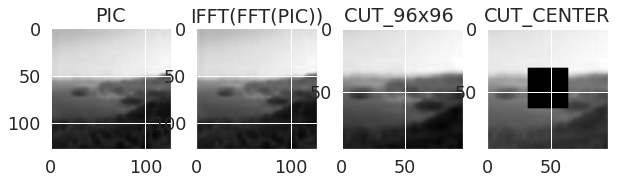

In [49]:
def get_mask():
  a=np.ones((96,96))
  a[32:64,32:64]=0
  return a 
print(all_pic.shape)
#plt.imshow(all_pic[330],cmap='bone')
pimg = all_pic[3344]
#plt.imshow(pimg)
f = np.fft.fft2(pimg) 
print(f.real)
invf = np.fft.ifft2(f) 
#plt.imshow(invf.real) 
all_pic_cut=all_pic[:,16:112,16:112]


fig, ax=plt.subplots(1,4,figsize=(10,10))
ax[0].imshow(all_pic[3344],cmap=plt.cm.gray)
ax[0].title.set_text('PIC')
ax[1].imshow(invf.real,cmap=plt.cm.gray)
ax[1].title.set_text('IFFT(FFT(PIC))')
ax[2].imshow(all_pic_cut[3344],cmap=plt.cm.gray)
ax[2].title.set_text('CUT_96x96 ')
ax[3].imshow((all_pic_cut*(get_mask().reshape(1,96,96)))[3344],cmap=plt.cm.gray)
ax[3].title.set_text('CUT_CENTER')
plt.show()


In [50]:
all_pic_cut

<tf.Tensor: shape=(4000, 96, 96), dtype=int32, numpy=
array([[[ 29,  30,  31, ...,  28,  28,  28],
        [ 31,  33,  34, ...,  28,  28,  28],
        [ 32,  34,  36, ...,  29,  28,  28],
        ...,
        [105, 103, 102, ..., 109, 107, 105],
        [107, 106, 105, ...,  98,  96,  94],
        [110, 108, 107, ...,  88,  87,  85]],

       [[122, 132, 131, ..., 106, 106, 104],
        [126, 133, 129, ..., 105, 108, 107],
        [125, 130, 125, ..., 102, 110, 111],
        ...,
        [124, 115, 103, ..., 147, 150, 143],
        [132, 123, 109, ..., 144, 148, 140],
        [134, 127, 114, ..., 144, 146, 137]],

       [[125, 141, 155, ...,  60,  59,  60],
        [122, 138, 151, ...,  59,  59,  60],
        [119, 136, 148, ...,  59,  58,  60],
        ...,
        [ 89,  92,  94, ...,  94,  93,  93],
        [ 84,  88,  92, ...,  99,  98,  97],
        [ 79,  85,  90, ..., 103, 102, 100]],

       ...,

       [[188, 189, 191, ..., 199, 199, 199],
        [188, 189, 190, ..., 199,

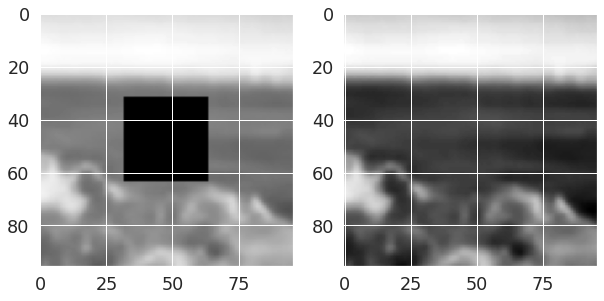

In [51]:
train_x_2=(all_pic_cut*(get_mask().reshape(1,96,96))) /255
train_y_2=all_pic_cut/255

train_x_2=np.array(train_x_2,dtype='float32').reshape(-1,96,96,1)
train_y_2=np.array(train_y_2,dtype='float32').reshape(-1,96,96,1)

fig, ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(train_x_2[3330].reshape(96,96),cmap=plt.cm.gray)
ax[1].imshow(train_y_2[3330].reshape(96,96),cmap=plt.cm.gray)
plt.show()
#print(train_x_2,train_y_2)

In [52]:
print(train_x_2.dtype)
train_X_2_tf = (tf.convert_to_tensor(train_x_2,dtype=tf.float32))

train_Y_2_tf = (tf.convert_to_tensor(train_y_2,dtype=tf.float32))


float32


In [ ]:
def get_model_2():
    
    img_input = layers.Input(shape=(96,96,1))
   
    # First convolution extracts 16 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    #x = layers.Resizing(48, 48, interpolation="bilinear", crop_to_aspect_ratio=False)(img_input)
    x = layers.Conv2D(128, 3, activation='relu')(img_input)
   # x = layers.MaxPooling3D(2)(x)
   
    xt = layers.Conv2D(96, 3, activation='relu')(x)
    
    x2 = layers.Conv2D(36, 3, activation='relu')(xt)
    #x2 = layers.MaxPooling2D(2)(x2)
    
    x3 = layers.Conv2D(8, 3, activation='relu')(x2)
    x3 = layers.Resizing(96, 96, interpolation="bilinear", crop_to_aspect_ratio=False)(x3)
    #x4 = layers.Reshape((32,32))(x3) 
 
     
    x4 = layers.Dense(4, activation='tanh')(x3)
    output = layers.Dense(1, activation='tanh')(x4)

    # Create model:
    model = Model(img_input, output)
    
    return model
tf.keras.backend.clear_session()

In [ ]:
def model_2_getfit(A,B):
    tf.keras.backend.clear_session()
    model_2 = get_model_2()
    model_2.summary()
    model_2.compile( loss=tf.keras.losses.MeanSquaredError() , #competition_loss, 
              optimizer=RMSprop(learning_rate=0.005),
              metrics=[tf.keras.metrics.MeanSquaredError()])


    history_2 = model_2.fit(A,B, validation_split=0.2, epochs =10) #delete
    return model_2, history_2

In [24]:
model_2, history_2 = model_2_getfit(train_X_2_tf,train_Y_2_tf)
'''
print("loss for validation data = ")
val_prediction=model.predict(val_X)
val_loss = tf.reduce_mean(tf.keras.metrics.MeanSquaredError(val3D_Y,val3D_prediction),keepdims=False)
print(val_3D_loss)
'''


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 96)        110688    
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 36)        31140     
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 88, 8)         2600      
                                                                 
 resizing (Resizing)         (None, 96, 96, 8)         0         
                                                                 
 dense (Dense)               (None, 96, 96, 4)         36    

KeyboardInterrupt: ignored

In [ ]:
#Define figure and axes
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.set_ylim(ymin=0., ymax=.03)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

# add the image 
plt.plot(history_2.history['loss'])

plt.plot(history_2.history['val_loss'])
#plt.scatter(len(history_3D.history['val_loss']),val_3D_loss)
#plt.scatter(10,history_3D.history['loss'][0])
# Add the boxe
#res=[]
#res.append([300,history_3D.history['loss'],(history_3D.history['val_loss'])])
# diplay
plt.show()

In [ ]:
y_pred_2_tf=model_2.predict(train_X_2_tf)

125/125 [==============================] - 3s 23ms/step


In [ ]:
 
fig, ax=plt.subplots(1,2,figsize=(10,10))
iim =  random.randint(0, 2000)
#iim=3344
ax[0].imshow(np.array(train_Y_2_tf[iim]).reshape(96,96),cmap=plt.cm.gray)
y_predi=y_pred_2_tf[iim] 
y_predi=y_predi.reshape(96,96)
ax[1].imshow(np.array(y_predi),cmap=plt.cm.gray)
plt.show()

# Start #3 model, #2 model in Fourier space

In [ ]:
def np_FFT(ARRAY):
  print(ARRAY.shape) #(-1,96,96,C)
  C= ARRAY.shape[3]
  F_ARRAY=np.zeros((ARRAY.shape[0],96,96,0))
  for i in range(C):
    # N,996,96,1
    _=np.fft.fft2(ARRAY[:,:,:,i]).reshape(-1,96,96,1)  
    #N,96,96,1 complex
    _=np.append(_.real,_.imag,axis=3)
    F_ARRAY=np.append(F_ARRAY,_, axis=3)
  del _
  return F_ARRAY

def np_IFFT(ARRAY):
  print(ARRAY.shape) #(-1,96,96,2C)  evern for real odd for imag on last axis
  C= int(ARRAY.shape[3]/2)
  F_ARRAY=np.zeros((ARRAY.shape[0],96,96,0))
  for i in range(C):
    # N,996,96,1
    _=ARRAY[:,:,:,2*i] + ARRAY[:,:,:,2*i+1]*1j
    #N,96,96 complex

 
    __=np.abs(np.fft.ifft2(_).reshape(-1,96,96,1) )
     
    #N,96,96,1 real 
    F_ARRAY=np.append(F_ARRAY,__, axis=3)
  del _
  del __
  return F_ARRAY

'''
f = np.fft.fft2(pimg) 
print(f.real)
invf = np.fft.ifft2(f) '''


'\nf = np.fft.fft2(pimg) \nprint(f.real)\ninvf = np.fft.ifft2(f) '

(4000, 96, 96, 1)
(3, 96, 96, 2)
float32
float32
(4000, 96, 96, 1) (3, 96, 96, 2)


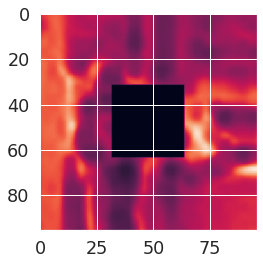

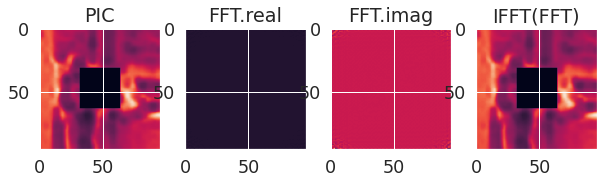

In [ ]:
train_x_2.shape, train_x_2[:,:,:,0].shape   #96 96 np 2d array float32 0-1
_=np.append(train_x_2,train_x_2,axis=3)
plt.imshow(_[2,:,:,0])
_.shape

_=train_x_2
__=np_FFT(_).astype(np.float32)[:3,:,:,:]
_FIF=np_IFFT(__).astype(np.float32)
print(__.dtype)
print(_FIF.dtype)
print(_.shape,__.shape)
fig, ax=plt.subplots(1,4,figsize=(10,10))
ax[0].imshow(_[2,:,:,0])
ax[0].title.set_text('PIC')
ax[1].imshow(__[2,:,:,0])
ax[1].title.set_text('FFT.real')
ax[2].imshow(__[2,:,:,1])
ax[2].title.set_text('FFT.imag')
ax[3].imshow(_FIF[2,:,:,0])
ax[3].title.set_text('IFFT(FFT)')
plt.show()
del _,__,_FIF

In [ ]:
train_x_3 = np_FFT(train_x_2).astype(np.float32) /400   #/300 is best
train_y_3 = np_FFT(train_y_2).astype(np.float32) /400
train_X_3_tf = (tf.convert_to_tensor(train_x_3,dtype=tf.float32))
train_Y_3_tf = (tf.convert_to_tensor(train_y_3,dtype=tf.float32))

(4000, 96, 96, 1)
(4000, 96, 96, 1)


In [ ]:
print(train_x_3.shape,np.max(train_x_3),np.min(train_x_3))


(4000, 96, 96, 2) 17.605864 -4.234919


In [ ]:
def get_model_3():
    
    img_input = layers.Input(shape=(96,96,2))
   
    # First convolution extracts 16 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    #x = layers.Resizing(48, 48, interpolation="bilinear", crop_to_aspect_ratio=False)(img_input)
   # x = layers.Conv2D(128, 3, activation='relu')(img_input)
   # x = layers.MaxPooling3D(2)(x)
   
   #xt = layers.Conv2D(96, 3, activation='relu')(x)
    
   # x2 = layers.Conv2D(36, 3, activation='relu')(xt)
    #x2 = layers.MaxPooling2D(2)(x2)
    
   # x3 = layers.Conv2D(16, 3, activation='relu')(x2)
   # x3 = layers.Resizing(96, 96, interpolation="bilinear", crop_to_aspect_ratio=False)(x3)
    #x4 = layers.Reshape((32,32))(x3) 
    x2 = layers.Dense(36, activation='relu')(img_input)
    x3 = layers.Dense(64, activation='relu')(x2)     
    x4 = layers.Dense(8, activation='relu')(x3)
    output = layers.Dense(2, activation='tanh')(x4)

    # Create model:
    model = Model(img_input, output)
    
    return model
tf.keras.backend.clear_session()

In [ ]:
def model_3_getfit(A,B):
    tf.keras.backend.clear_session()
    model_3 = get_model_3()
    model_3.summary()
    model_3.compile( loss=tf.keras.losses.MeanSquaredError() , #competition_loss, 
              optimizer=RMSprop(learning_rate=0.0005),
              metrics=[tf.keras.metrics.MeanSquaredError()])


    history_3 = model_3.fit(A,B, validation_split=0.2, epochs =50) #delete
    return model_3, history_3

In [ ]:
model_3, history_3 = model_3_getfit(train_X_3_tf,train_Y_3_tf)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 2)]       0         
                                                                 
 dense (Dense)               (None, 96, 96, 36)        108       
                                                                 
 dense_1 (Dense)             (None, 96, 96, 64)        2368      
                                                                 
 dense_2 (Dense)             (None, 96, 96, 8)         520       
                                                                 
 dense_3 (Dense)             (None, 96, 96, 2)         18        
                                                                 
Total params: 3,014
Trainable params: 3,014
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
100/100 [==============================] - 3s 25

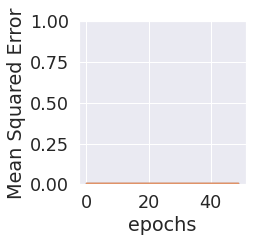

In [ ]:
#Define figure and axes
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.set_ylim(ymin=0.)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

# add the image 
plt.plot(history_3.history['loss'])

plt.plot(history_3.history['val_loss'])
#plt.scatter(len(history_3D.history['val_loss']),val_3D_loss)
#plt.scatter(10,history_3D.history['loss'][0])
# Add the boxe
#res=[]
#res.append([300,history_3D.history['loss'],(history_3D.history['val_loss'])])
# diplay
plt.show()

In [ ]:
y_pred_3_tf=model_3.predict(train_X_3_tf)
_REAL=np.array(train_Y_2_tf)
_FIF_Y=np_IFFT(np.array(train_Y_3_tf)*400)
_FIF_PREDY=np_IFFT(np.array(y_pred_3_tf)*400)

125/125 [==============================] - 1s 8ms/step
(4000, 96, 96, 2)
(4000, 96, 96, 2)


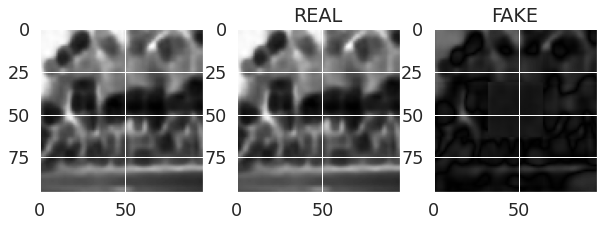

In [ ]:
fig, ax=plt.subplots(1,3,figsize=(10,10))
iim =  random.randint(0, 2000)

ax[0].imshow(np.array(_REAL[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[1].imshow(np.array(_FIF_Y[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[1].title.set_text('REAL')
y_predi=_FIF_PREDY[iim].reshape(96,96)
ax[2].imshow(np.array(y_predi),cmap=plt.cm.gray)
ax[2].title.set_text('FAKE')
plt.show()

# start #4 model, gaussian mask in real space

In [182]:
def get_mask_gaussian():
  _one=np.ones((96,96),dtype=np.float32)
  _x=np.linspace(-1,1,96).reshape(1,96)
  _y=np.linspace(-1,1,96).reshape(96,1)
  _w=.8
  _gauss=np.exp(-_w*(_x**2+_y**2))**5
  _mask=(np.tanh(_one-_gauss)).astype(np.float32)
  print(_gauss)
  return _mask
 
 

(4000, 128, 128)
MAX is 1899599.0 679754.6650713816
[[0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 ...
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]]
[[0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 ...
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]]


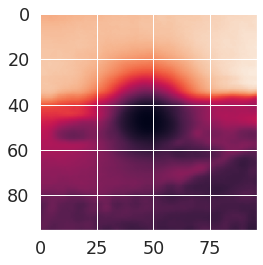

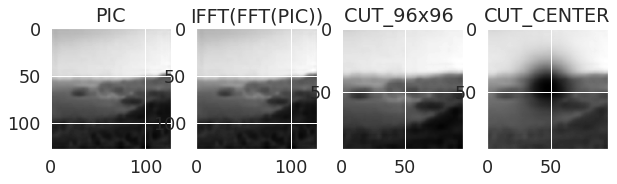

[[0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 ...
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]]


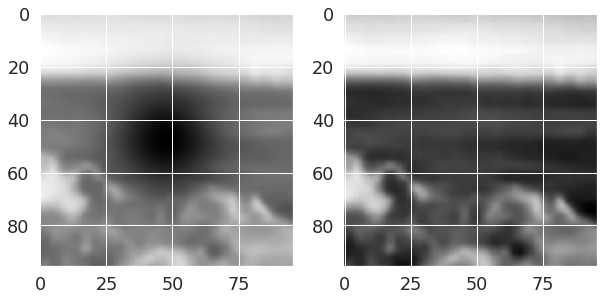

float32


In [183]:
 
print(all_pic.shape)
#plt.imshow(all_pic[330],cmap='bone')
pimg = all_pic[3344]
#plt.imshow(pimg)
f = np.fft.fft2(pimg) 
print('MAX is',np.amax(f.real), np.amax(f.imag))
invf = np.fft.ifft2(f) 
#plt.imshow(invf.real) 

all_pic_cut=np.array(all_pic[:,16:112,16:112])
x=np.array(all_pic_cut[3344])
plt.imshow(x*get_mask_gaussian())

fig, ax=plt.subplots(1,4,figsize=(10,10))
ax[0].imshow(all_pic[3344],cmap=plt.cm.gray)
ax[0].title.set_text('PIC')
ax[1].imshow(invf.real,cmap=plt.cm.gray)
ax[1].title.set_text('IFFT(FFT(PIC))')
ax[2].imshow(all_pic_cut[3344],cmap=plt.cm.gray)
ax[2].title.set_text('CUT_96x96 ')
ax[3].imshow((all_pic_cut*(get_mask_gaussian().reshape(1,96,96)))[3344],cmap=plt.cm.gray)
ax[3].title.set_text('CUT_CENTER')
plt.show()

#all_pic_cut

train_x_4=(all_pic_cut*(get_mask_gaussian().reshape(1,96,96))) /255
train_y_4=all_pic_cut/255

train_x_4=np.array(train_x_4,dtype='float32').reshape(-1,96,96,1)
train_y_4=np.array(train_y_4,dtype='float32').reshape(-1,96,96,1)

fig, ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(train_x_4[3330].reshape(96,96),cmap=plt.cm.gray)
ax[1].imshow(train_y_4[3330].reshape(96,96),cmap=plt.cm.gray)
plt.show()
#print(train_x_4,train_y_4)

print(train_x_4.dtype)
train_X_4_tf = (tf.convert_to_tensor(train_x_4,dtype=tf.float32))

train_Y_4_tf = (tf.convert_to_tensor(train_y_4,dtype=tf.float32))



def get_model_4():
    
    img_input = layers.Input(shape=(96,96,1))
   
    # First convolution extracts 16 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    #x = layers.Resizing(48, 48, interpolation="bilinear", crop_to_aspect_ratio=False)(img_input)
    x = layers.Conv2D(4, 3, activation='relu')(img_input)
   # x = layers.MaxPooling3D(2)(x)
   
    xt = layers.Conv2D(8, 3, activation='relu')(x)
    
    x2 = layers.Conv2D(16, 3, activation='relu')(xt)
    #x2 = layers.MaxPooling2D(2)(x2)
    
    x3 = layers.Conv2D(4, 3, activation='relu')(x2)
    x3 = layers.Resizing(96, 96, interpolation="bilinear", crop_to_aspect_ratio=False)(x3)
    #x4 = layers.Reshape((32,32))(x3) 
 
     
    x4 = layers.Dense(2, activation='tanh')(x3)
    output = layers.Dense(1, activation='tanh')(x4)

    # Create model:
    model = Model(img_input, output)
    
    return model
tf.keras.backend.clear_session()
 

In [196]:

def model_4_getfit(A,B):
    tf.keras.backend.clear_session()
    model_4 = get_model_4() 
    model_4.summary()
    model_4.compile( loss=tf.keras.losses.MeanSquaredError() , #competition_loss, 
              optimizer=RMSprop(learning_rate=0.005),
              metrics=[tf.keras.metrics.MeanSquaredError()])


    history_4 = model_4.fit(A,B, validation_split=0.2, epochs =50) #delete
    return model_4, history_4

model_4, history_4 = model_4_getfit(train_X_4_tf,train_Y_4_tf)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 8)         296       
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 88, 4)         580       
                                                                 
 resizing (Resizing)         (None, 96, 96, 4)         0         
                                                                 
 dense (Dense)               (None, 96, 96, 2)         10    

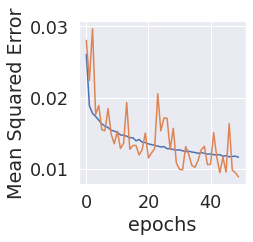

125/125 [==============================] - 1s 4ms/step


In [197]:

#Define figure and axes
fig, ax = plt.subplots(1,1, figsize=(3,3))
#ax.set_ylim(ymin=0., ymax=.03)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

# add the image 
plt.plot(history_4.history['loss'])

plt.plot(history_4.history['val_loss'])
#plt.scatter(len(history_3D.history['val_loss']),val_3D_loss)
#plt.scatter(10,history_3D.history['loss'][0])
# Add the boxe
#res=[]
#res.append([300,history_3D.history['loss'],(history_3D.history['val_loss'])])
# diplay
plt.show()

y_pred_4_tf=model_4.predict(train_X_4_tf)

 

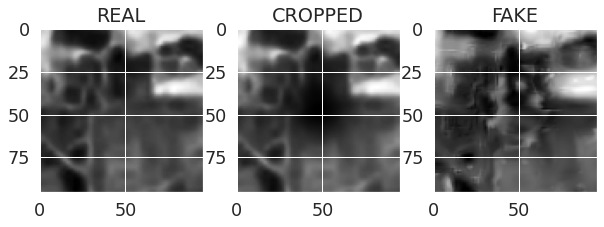

In [206]:
fig, ax=plt.subplots(1,3,figsize=(10,10))
iim =  random.randint(0, 2000)
#iim=3344
ax[0].imshow(np.array(train_Y_4_tf[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[0].title.set_text('REAL')
y_predi=y_pred_4_tf[iim] 
y_predi=y_predi.reshape(96,96)

ax[1].imshow(np.array(train_X_4_tf[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[1].title.set_text('CROPPED')
ax[2].imshow(np.array(y_predi),cmap=plt.cm.gray)
ax[2].title.set_text('FAKE')
plt.show()

In [218]:
train_X_42_tf = (tf.convert_to_tensor(train_x_2*(get_mask_gaussian().reshape(1,96,96,1)),dtype=tf.float32))
y_pred_42_tf=model_4.predict(train_X_42_tf)

[[0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 ...
 [0.0004665  0.0005511  0.00064873 ... 0.00064873 0.0005511  0.0004665 ]
 [0.00039629 0.00046816 0.0005511  ... 0.0005511  0.00046816 0.00039629]
 [0.00033546 0.00039629 0.0004665  ... 0.0004665  0.00039629 0.00033546]]
125/125 [==============================] - 0s 4ms/step


In [219]:
(train_x_2).shape, np.amax(train_x_2), np.amin(train_x_2)

((4000, 96, 96, 1), 1.0, 0.0)

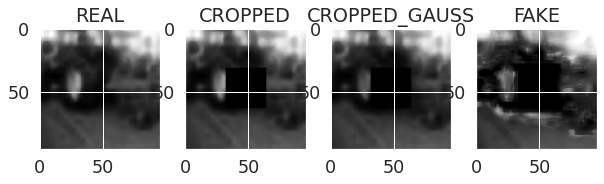

In [222]:
fig, ax=plt.subplots(1,4,figsize=(10,10))
iim =  random.randint(0, 2000)
#iim=3344
ax[0].imshow(np.array(train_Y_2_tf[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[0].title.set_text('REAL')
y_predi=y_pred_42_tf[iim] 
y_predi=y_predi.reshape(96,96)

ax[1].imshow(np.array(train_X_2_tf[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[1].title.set_text('CROPPED')

ax[2].imshow(np.array(train_X_42_tf[iim]).reshape(96,96),cmap=plt.cm.gray)
ax[2].title.set_text('CROPPED_GAUSS')

ax[3].imshow(np.array(y_predi),cmap=plt.cm.gray)
ax[3].title.set_text('FAKE')
plt.show()